# Importing Libraries

In [ ]:
# Importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# Dataset Loading

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
df.shape

(2000, 21)

In [ ]:
# Dataset Duplicate Value Count
duplicated_values_count = len(df[df.duplicated()])

print("Number of duplicated values:", duplicated_values_count)

Number of duplicated values: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df_1=df[df['sc_w']!=0]
df_1.shape

(1820, 21)

# Data Visualization

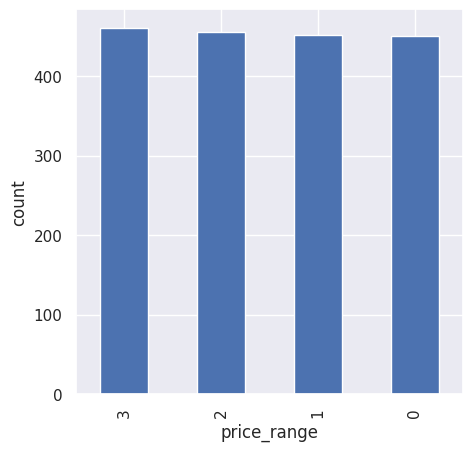

In [ ]:
# price charge
sns.set()
price_plot=df_1['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('count')
plt.show()

# Data Distribution

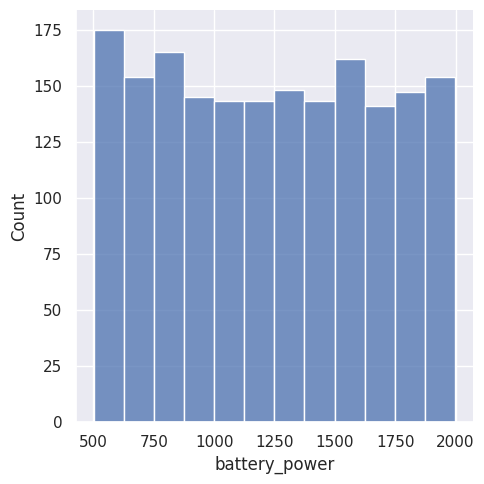

In [ ]:
# Battery Power
sns.set(rc={'figure.figsize':(5,5)})
sns.displot(data=df_1['battery_power'])
plt.show()

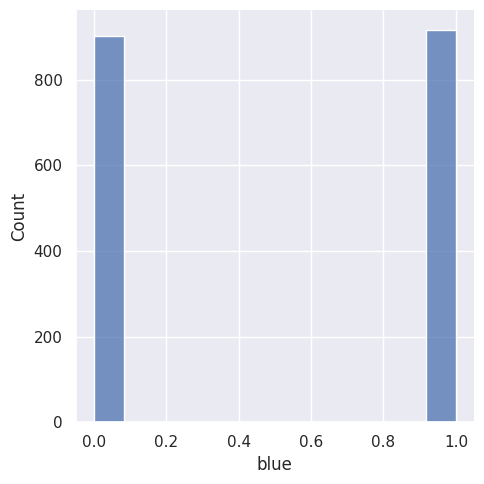

In [ ]:
# Bluetooth
sns.set(rc={'figure.figsize':(5,5)})
sns.displot(data=df_1['blue'])
plt.show()

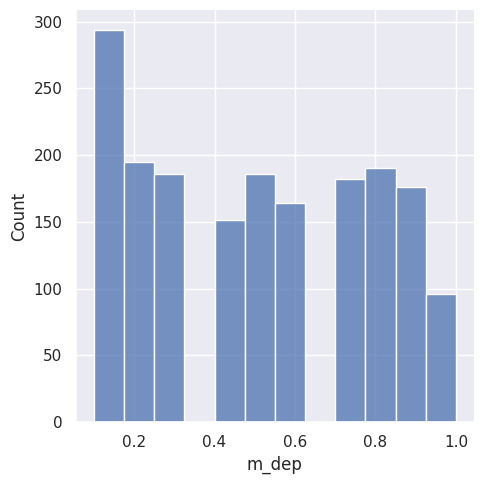

In [ ]:
# Mobile Depth(in cm)
sns.set(rc={'figure.figsize':(5,5)})
sns.displot(data=df_1['m_dep'])
plt.show()

In [ ]:
x=df_1.drop(['price_range'],axis=1)
y=df_1['price_range']
# missing values
x.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

# Data Scaling

In [ ]:
# Data Scalling
# Scaling values of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


# Data Splitting

In [ ]:
X=df_1.drop(['price_range'],axis=1)
Y=df['price_range']

In [ ]:
X.shape

(1820, 20)

In [ ]:
Y.shape

(2000,)

In [ ]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 42)


In [ ]:
X_train.shape

(1456, 20)

In [ ]:
y_train.shape

(1456,)

# Model Implementation
# Model 1-- Logistic Regression

In [ ]:
# Model 1-Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.73      0.85      0.78        72
           1       0.51      0.58      0.54        90
           2       0.51      0.50      0.51        98
           3       0.77      0.61      0.68       104

    accuracy                           0.62       364
   macro avg       0.63      0.63      0.63       364
weighted avg       0.63      0.62      0.62       364

[[61 22  1  0]
 [11 52 29 10]
 [ 0 16 49 31]
 [ 0  0 19 63]]


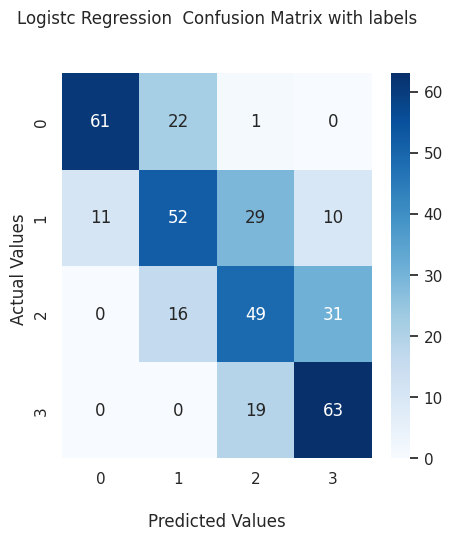

In [ ]:
# Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)


from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))


# Predict on the model
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Logistc Regression  Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()



In [ ]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))


Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       383
           1       0.88      0.92      0.90       334
           2       0.88      0.93      0.90       338
           3       0.99      0.94      0.97       401

    accuracy                           0.93      1456
   macro avg       0.93      0.93      0.93      1456
weighted avg       0.94      0.93      0.93      1456



# Cross-validation and hyper parameter tuning
#  Model 2--- XG Boost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the XGBoost classifier
xgb = XGBClassifier()

# Define the hyperparameter search space
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
}

# Perform cross-validation and hyperparameter tuning
grid_search = GridSearchCV(xgb, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and CV score
print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

# Evaluate the tuned model on the test set
y_pred_test = grid_search.predict(X_test)
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)



Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Cross-validation score: 0.8962881890505108
Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        84
           1       0.97      0.87      0.92       102
           2       0.88      0.86      0.87        96
           3       0.88      0.96      0.92        82

    accuracy                           0.92       364
   macro avg       0.92      0.92      0.92       364
weighted avg       0.92      0.92      0.92       364



[[61 22  1  0]
 [11 52 29 10]
 [ 0 16 49 31]
 [ 0  0 19 63]]


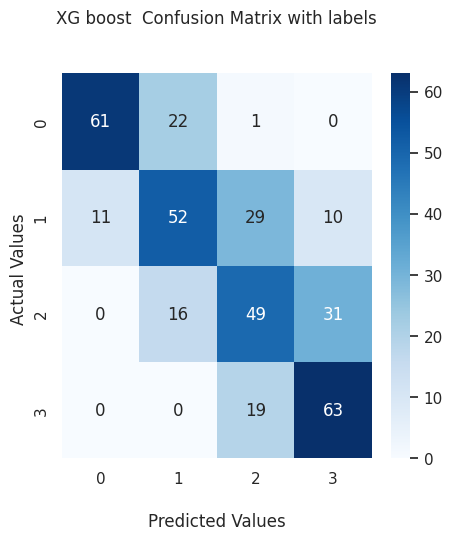

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('XG boost  Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)


Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       367
           1       0.92      0.88      0.90       350
           2       0.93      0.88      0.90       360
           3       0.94      0.99      0.97       379

    accuracy                           0.93      1456
   macro avg       0.93      0.93      0.93      1456
weighted avg       0.93      0.93      0.93      1456



# Model 3 --- Random Forest Classifier

In [ ]:
# ML Model - 3 Random Forest
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.8763736263736264

In [ ]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score


1.0

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93        84
           1       0.91      0.81      0.86       102
           2       0.85      0.80      0.82        96
           3       0.84      0.96      0.90        82

    accuracy                           0.88       364
   macro avg       0.88      0.88      0.88       364
weighted avg       0.88      0.88      0.88       364



[[80  4  0  0]
 [ 8 83 11  0]
 [ 0  4 77 15]
 [ 0  0  3 79]]


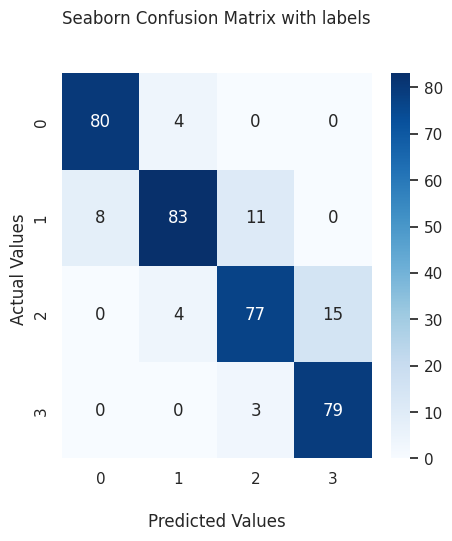

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()



In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()


,Feature,Score
0,ram,0.473312
1,battery_power,0.073027
2,px_height,0.057676
3,px_width,0.055110
4,mobile_wt,0.041186


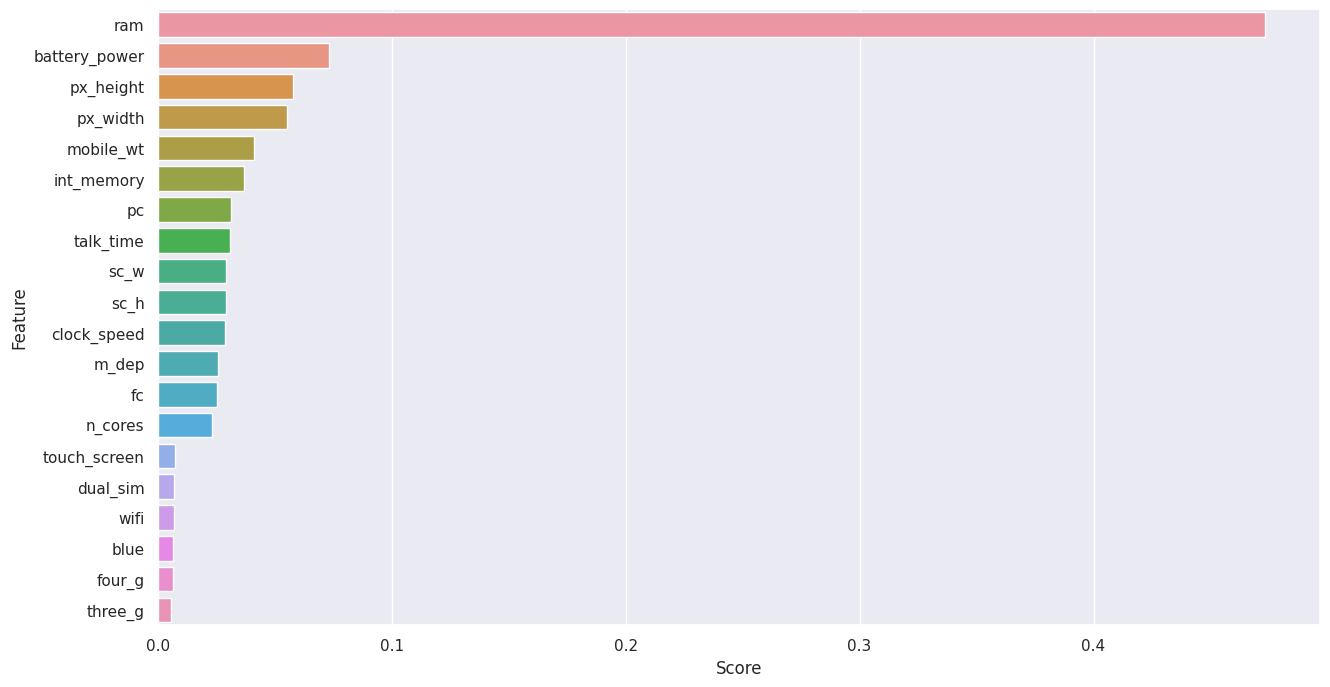

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques

from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
clsr.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'max_leaf_nodes': 40,
 'min_samples_split': 4,
 'n_estimators': 200}

In [ ]:
clsr.best_estimator_

RandomForestClassifier(max_depth=20, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [ ]:
clsr.best_score_

0.8637295360508044

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [ ]:
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

0.8406593406593407

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.96      0.92        84
           1       0.90      0.73      0.80       102
           2       0.78      0.76      0.77        96
           3       0.81      0.95      0.88        82

    accuracy                           0.84       364
   macro avg       0.84      0.85      0.84       364
weighted avg       0.84      0.84      0.84       364



[[61 22  1  0]
 [11 52 29 10]
 [ 0 16 49 31]
 [ 0  0 19 63]]


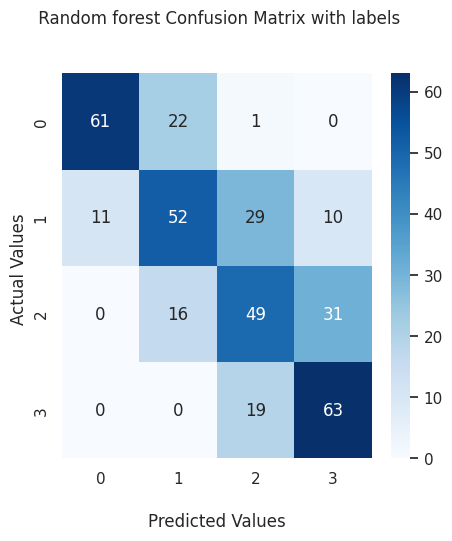

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Random forest Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()



In [ ]:
y_pred = clsr.predict(X_train)
accuracy_score(y_train, y_pred)


0.9629120879120879

In [ ]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       367
           1       0.95      0.91      0.93       350
           2       0.96      0.96      0.96       360
           3       0.99      0.99      0.99       379

    accuracy                           0.96      1456
   macro avg       0.96      0.96      0.96      1456
weighted avg       0.96      0.96      0.96      1456



In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()



,Feature,Score
0,ram,0.656088
1,battery_power,0.071816
2,px_width,0.048953
3,px_height,0.046762
4,mobile_wt,0.028626


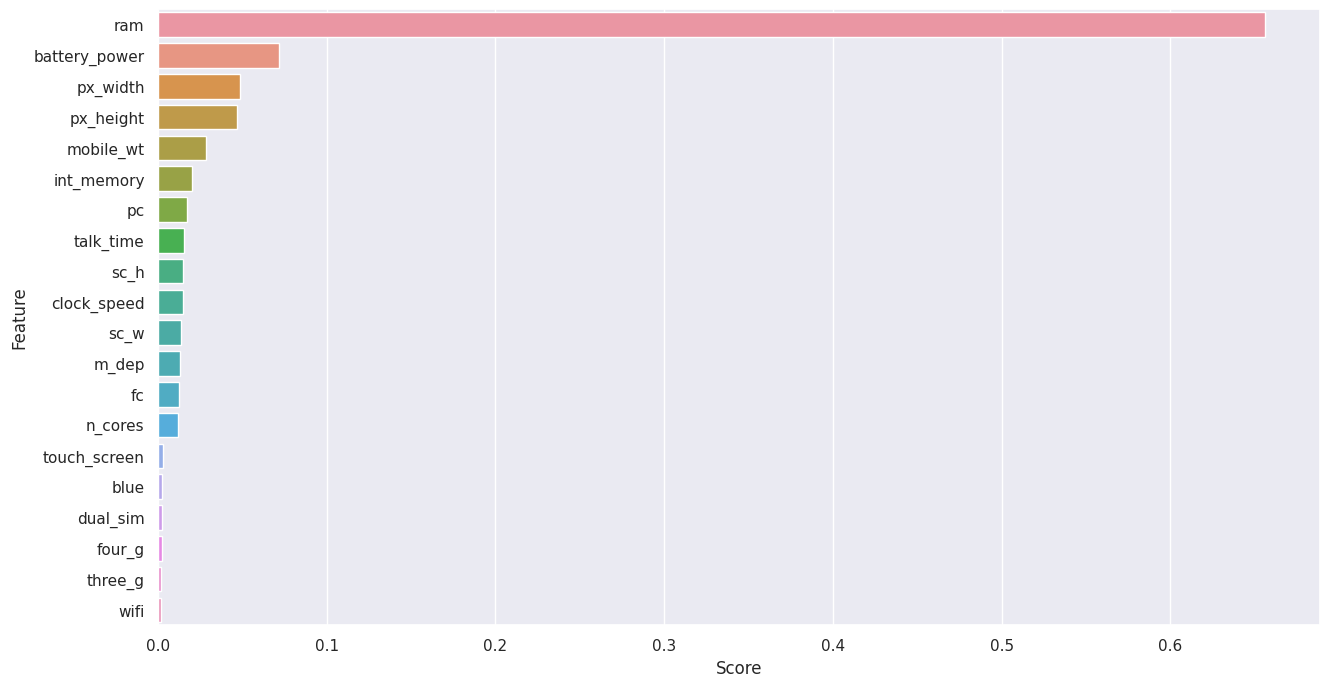

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()
